In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
import warnings

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%pylab inline
plt.style.use("bmh")

Populating the interactive namespace from numpy and matplotlib


In [4]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [5]:
warnings.filterwarnings('ignore')

# Feature Selection
Feature selection is the process of reducing the number of input variables when developing a predictive model.It is an important step to avoid curse of dimensionality.

`To avoid overfitting, the test data must not be used in any way to make choices about the model, including feature selection. Therfore, Split to test and train and use only train data to select features and in the end, you can use transform in test data `

* Unsupervised: Do not use the target variable (e.g. remove redundant variables). 
    * Correlation
* Supervised: Use the target variable (e.g. remove irrelevant variables).
    * Wrapper: Search for well-performing subsets of features. `It is useful when the dataset is small`
        * **Forward Selection**: Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

        * **Backward Elimination**: In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.

        * **Recursive Feature elimination**: It is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.
    * Filter: Select subsets of features based on their relationship with the target.
        * Statistical Methods
        * Feature Importance Methods
    * Embedded 
    * Intrinsic: Algorithms that perform automatic feature selection during training.
        * Decision Trees
* Dimensionality Reduction: Project input data into a lower-dimensional feature space.

![image.png](https://machinelearningmastery.com/wp-content/uploads/2019/11/Overview-of-Feature-Selection-Techniques3.png)

For more example: https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b



## 01. Dropping constant features (Variance Threshold)
In this step, we will be removing the features which have constant features which are actually not important for solving the problem statement. This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning.

In [6]:
# Make DataFrame of the given data 
data = pd.DataFrame({"A":[1,2,4,1,2,4], 
                    "B":[4,5,6,7,8,9], 
                    "C":[0,0,0,0,0,0],
                    "D":[1,1,1,1,1,1]})

In [7]:
data.head()

,A,B,C,D
0,1,4,0,1
1,2,5,0,1
2,4,6,0,1
3,1,7,0,1
4,2,8,0,1


In [8]:
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold=0) # it will remove zero variance features
var_thres.fit(data)

VarianceThreshold(threshold=0)

In [9]:
var_thres.get_support()

array([ True,  True, False, False])

In [10]:
constant_columns = [column for column in data.columns
                    if column not in data.columns[var_thres.get_support()]]

print(len(constant_columns))

2


In [11]:
for feature in constant_columns:
    print(feature)

C
D


In [14]:
data.drop(constant_columns,axis=1)

,A,B
0,1,4
1,2,5
2,4,6
3,1,7
4,2,8
5,4,9


## 02.Feature selection with correlation (Multicollinearity)
In this step, we will be removing the features which are heighly correlated

In [16]:
from sklearn.datasets import load_boston

In [18]:
data = load_boston()
df =pd.DataFrame(data.data, columns=data.feature_names)
df['MEDV'] = data.target

In [19]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.00000,2.31000,0.00000,0.53800,6.57500,65.20000,4.09000,1.00000,296.00000,15.30000,396.90000,4.98000,24.00000
1,0.02731,0.00000,7.07000,0.00000,0.46900,6.42100,78.90000,4.96710,2.00000,242.00000,17.80000,396.90000,9.14000,21.60000
2,0.02729,0.00000,7.07000,0.00000,0.46900,7.18500,61.10000,4.96710,2.00000,242.00000,17.80000,392.83000,4.03000,34.70000
3,0.03237,0.00000,2.18000,0.00000,0.45800,6.99800,45.80000,6.06220,3.00000,222.00000,18.70000,394.63000,2.94000,33.40000
4,0.06905,0.00000,2.18000,0.00000,0.45800,7.14700,54.20000,6.06220,3.00000,222.00000,18.70000,396.90000,5.33000,36.20000


In [20]:
X = df.drop('MEDV', axis=1)
y = df.MEDV

In [21]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.00000,2.31000,0.00000,0.53800,6.57500,65.20000,4.09000,1.00000,296.00000,15.30000,396.90000,4.98000
1,0.02731,0.00000,7.07000,0.00000,0.46900,6.42100,78.90000,4.96710,2.00000,242.00000,17.80000,396.90000,9.14000
2,0.02729,0.00000,7.07000,0.00000,0.46900,7.18500,61.10000,4.96710,2.00000,242.00000,17.80000,392.83000,4.03000
3,0.03237,0.00000,2.18000,0.00000,0.45800,6.99800,45.80000,6.06220,3.00000,222.00000,18.70000,394.63000,2.94000
4,0.06905,0.00000,2.18000,0.00000,0.45800,7.14700,54.20000,6.06220,3.00000,222.00000,18.70000,396.90000,5.33000


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=0)

In [23]:
X_train.shape, y_train.shape

((354, 13), (152, 13))

<AxesSubplot:>

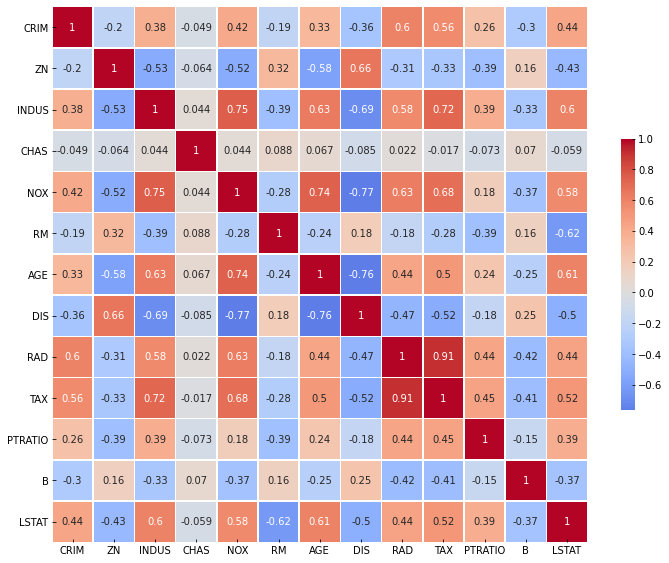

In [27]:
plt.figure(figsize=(12,10))
cr_matrix   = X_train.corr()
sns.heatmap(cr_matrix, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, cmap=plt.cm.coolwarm, annot=True)

In [28]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [29]:
corr_features =  correlation(X_train,0.7)

In [30]:
corr_features

{'AGE', 'DIS', 'NOX', 'TAX'}

In [31]:
X_train.drop(corr_features,axis=1)

,CRIM,ZN,INDUS,CHAS,RM,RAD,PTRATIO,B,LSTAT
141,1.62864,0.00000,21.89000,0.00000,5.01900,4.00000,21.20000,396.90000,34.41000
272,0.11460,20.00000,6.96000,0.00000,6.53800,3.00000,18.60000,394.96000,7.73000
135,0.55778,0.00000,21.89000,0.00000,6.33500,4.00000,21.20000,394.67000,16.96000
298,0.06466,70.00000,2.24000,0.00000,6.34500,5.00000,14.80000,368.24000,4.97000
122,0.09299,0.00000,25.65000,0.00000,5.96100,2.00000,19.10000,378.09000,17.93000
...,...,...,...,...,...,...,...,...,...
323,0.28392,0.00000,7.38000,0.00000,5.70800,5.00000,19.60000,391.13000,11.74000
192,0.08664,45.00000,3.44000,0.00000,7.17800,5.00000,15.20000,390.49000,2.87000
117,0.15098,0.00000,10.01000,0.00000,6.02100,6.00000,17.80000,394.51000,10.30000
47,0.22927,0.00000,6.91000,0.00000,6.03000,3.00000,17.90000,392.74000,18.80000


## Statistics-based (Univariate, Bivariate)
Statistical tests can be used to select those features that have the strongest relationship with the output variable.

![image.png](https://machinelearningmastery.com/wp-content/uploads/2019/11/How-to-Choose-Feature-Selection-Methods-For-Machine-Learning.png)!

## 03. Mutual information (information gain)
* Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.
* The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances. Inshort, a quantity called mutual information measures the amount of information one can obtain from one random variable given another.


### For Classification problem

In [32]:
df=pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23000,1.71000,2.43000,15.60000,127,2.80000,3.06000,0.28000,2.29000,5.64000,1.04000,3.92000,1065
1,1,13.20000,1.78000,2.14000,11.20000,100,2.65000,2.76000,0.26000,1.28000,4.38000,1.05000,3.40000,1050
2,1,13.16000,2.36000,2.67000,18.60000,101,2.80000,3.24000,0.30000,2.81000,5.68000,1.03000,3.17000,1185
3,1,14.37000,1.95000,2.50000,16.80000,113,3.85000,3.49000,0.24000,2.18000,7.80000,0.86000,3.45000,1480
4,1,13.24000,2.59000,2.87000,21.00000,118,2.80000,2.69000,0.39000,1.82000,4.32000,1.04000,2.93000,735


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [37]:
df.Wine.unique()

array([1, 2, 3])

In [38]:
X = df.drop('Wine',axis=1)
y = df.Wine

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=0)

In [51]:
X_train.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
22,13.71000,1.86000,2.36000,16.60000,101,2.61000,2.88000,0.27000,1.69000,3.80000,1.11000,4.00000,1035
108,12.22000,1.29000,1.94000,19.00000,92,2.36000,2.04000,0.39000,2.08000,2.70000,0.86000,3.02000,312
175,13.27000,4.28000,2.26000,20.00000,120,1.59000,0.69000,0.43000,1.35000,10.20000,0.59000,1.56000,835
145,13.16000,3.57000,2.15000,21.00000,102,1.50000,0.55000,0.43000,1.30000,4.00000,0.60000,1.68000,830
71,13.86000,1.51000,2.67000,25.00000,86,2.95000,2.86000,0.21000,1.87000,3.38000,1.36000,3.16000,410


In [52]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info
# As the value is highest, the relationship between the feature and target feature is higher

array([0.42000646, 0.29236878, 0.17355571, 0.23484291, 0.23337299,
       0.47681815, 0.72223445, 0.10341246, 0.26004253, 0.62741182,
       0.53364533, 0.54577184, 0.55017739])

In [53]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Flavanoids             0.72223
Color.int              0.62741
Proline                0.55018
OD                     0.54577
Hue                    0.53365
Phenols                0.47682
Alcohol                0.42001
Malic.acid             0.29237
Proanth                0.26004
Acl                    0.23484
Mg                     0.23337
Ash                    0.17356
Nonflavanoid.phenols   0.10341
dtype: float64

<AxesSubplot:>

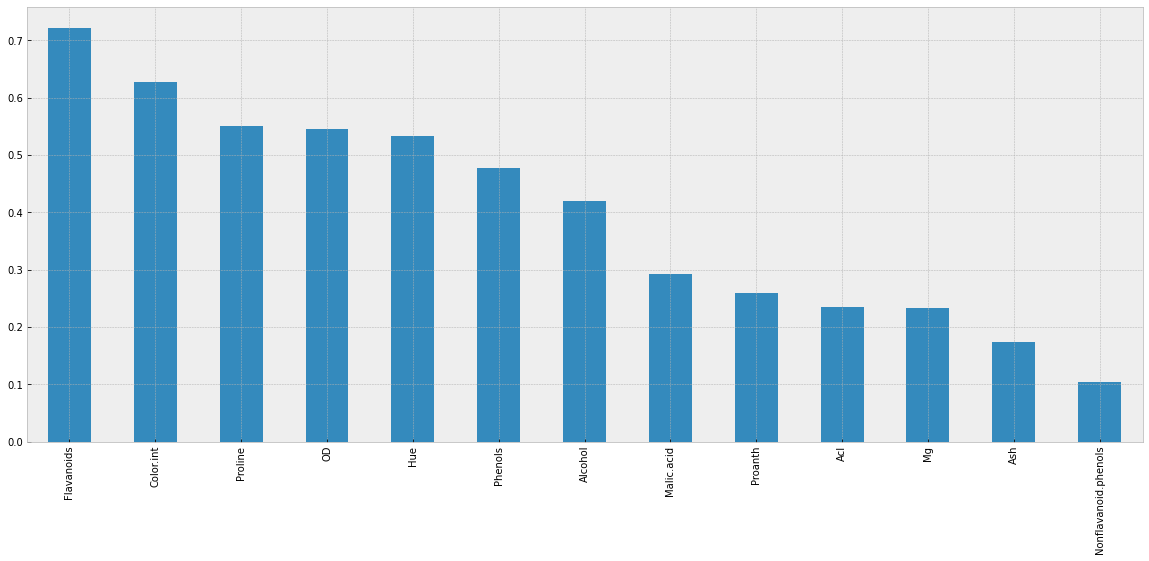

In [54]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [55]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif

In [64]:
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

### For Regression problem

In [72]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Advanced-House-Price-Prediction-/master/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [75]:
numeric_lst=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_cols = list(df.select_dtypes(include=numeric_lst).columns)

In [78]:
housing_df=df[numerical_cols]
housing_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.00000,8450,7,5,2003,2003,196.00000,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.00000,9600,6,8,1976,1976,0.00000,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.00000,11250,7,5,2001,2002,162.00000,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.00000,9550,7,5,1915,1970,0.00000,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.00000,14260,8,5,2000,2000,350.00000,655,...,192,84,0,0,0,0,0,12,2008,250000


In [79]:
housing_df=housing_df.drop("Id",axis=1)

In [80]:
### It is always a good practice to split train and test data to avoid
#overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(housing_df.drop(labels=['SalePrice'], axis=1),
    housing_df['SalePrice'],
    test_size=0.3,
    random_state=0)

In [81]:
X_train.isnull().sum()

MSSubClass         0
LotFrontage      189
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         5
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       54
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [82]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([2.47757462e-01, 2.12308932e-01, 1.67534267e-01, 5.32689944e-01,
       1.01756054e-01, 3.45686762e-01, 2.48596967e-01, 1.07725858e-01,
       1.61107135e-01, 1.36946115e-05, 1.13244363e-01, 3.85874673e-01,
       3.12113941e-01, 2.27700440e-01, 2.40711409e-03, 4.80891555e-01,
       3.91051466e-02, 0.00000000e+00, 2.63801324e-01, 7.62599267e-02,
       4.35809733e-02, 3.25423590e-02, 1.77185028e-01, 1.85703163e-01,
       2.70326219e-01, 3.72519270e-01, 3.70763425e-01, 6.51288339e-02,
       1.81087976e-01, 1.37063666e-02, 5.56982266e-03, 1.61349509e-02,
       2.42171585e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [83]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

OverallQual     0.53269
GrLivArea       0.48089
TotalBsmtSF     0.38587
GarageCars      0.37252
GarageArea      0.37076
YearBuilt       0.34569
1stFlrSF        0.31211
GarageYrBlt     0.27033
FullBath        0.26380
YearRemodAdd    0.24860
MSSubClass      0.24776
2ndFlrSF        0.22770
LotFrontage     0.21231
Fireplaces      0.18570
OpenPorchSF     0.18109
TotRmsAbvGrd    0.17719
LotArea         0.16753
BsmtFinSF1      0.16111
BsmtUnfSF       0.11324
MasVnrArea      0.10773
OverallCond     0.10176
HalfBath        0.07626
WoodDeckSF      0.06513
BedroomAbvGr    0.04358
BsmtFullBath    0.03911
KitchenAbvGr    0.03254
ScreenPorch     0.01613
EnclosedPorch   0.01371
3SsnPorch       0.00557
PoolArea        0.00242
LowQualFinSF    0.00241
BsmtFinSF2      0.00001
YrSold          0.00000
MoSold          0.00000
MiscVal         0.00000
BsmtHalfBath    0.00000
dtype: float64

<AxesSubplot:>

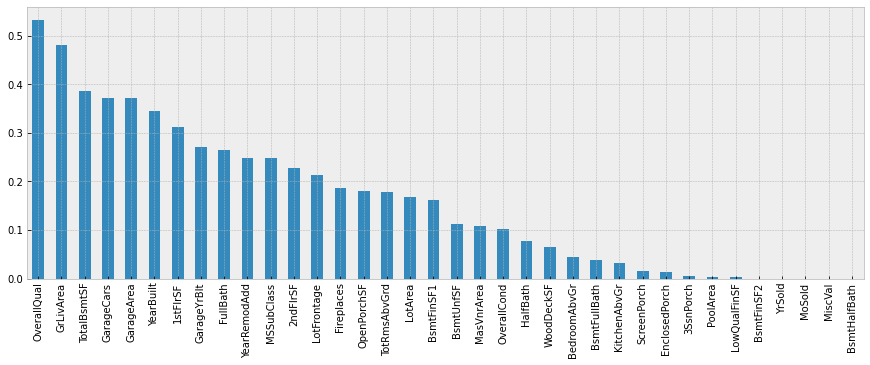

In [84]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [85]:
from sklearn.feature_selection import SelectPercentile
## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train.fillna(0), y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x7f9c01ad57a0>)

In [86]:
X_train.columns[selected_top_columns.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')

## 04. Chi2 Statistical Analysis
The Chi Square statistic is commonly used for testing relationships between categorical variables.

In [89]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.00000,1,0,7.25000,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.00000,1,0,71.28330,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.00000,0,0,7.92500,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.00000,1,0,53.10000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.00000,0,0,8.05000,S,Third,man,True,NaN,Southampton,no,True


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [91]:
##['sex','embarked','alone','pclass','Survived']
df=df[['sex','embarked','alone','pclass','survived']]
df.head()

,sex,embarked,alone,pclass,survived
0,male,S,False,3,0
1,female,C,False,1,1
2,female,S,True,3,1
3,female,S,False,1,1
4,male,S,True,3,0


In [92]:
df['sex']=np.where(df['sex']=="male",1,0)
df.head()

,sex,embarked,alone,pclass,survived
0,1,S,False,3,0
1,0,C,False,1,1
2,0,S,True,3,1
3,0,S,False,1,1
4,1,S,True,3,0


In [93]:
### let's perform label encoding on embarked
ordinal_label = {k: i for i, k in enumerate(df['embarked'].unique(), 0)}
df['embarked'] = df['embarked'].map(ordinal_label)

In [94]:
df.head()

,sex,embarked,alone,pclass,survived
0,1,0,False,3,0
1,0,1,False,1,1
2,0,0,True,3,1
3,0,0,False,1,1
4,1,0,True,3,0


In [95]:
### let's perform label encoding on alone
df['alone']=np.where(df['alone']==True,1,0)

In [96]:
df.head()

,sex,embarked,alone,pclass,survived
0,1,0,0,3,0
1,0,1,0,1,1
2,0,0,1,3,1
3,0,0,0,1,1
4,1,0,1,3,0


In [98]:
### train Test split is usually done to avaoid overfitting
X_train,X_test,y_train,y_test=train_test_split(df[['sex','embarked','alone','pclass']],
                                              df['survived'],test_size=0.3,random_state=100)

In [99]:
X_train.head()

,sex,embarked,alone,pclass
69,1,0,0,3
85,0,0,0,3
794,1,0,1,3
161,0,0,1,2
815,1,0,1,1


In [102]:
## Perform chi2 test
### chi2 returns 2 values
### Fscore and the pvalue
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)
f_p_values

(array([65.67929505,  7.55053653, 10.88471585, 21.97994154]),
 array([5.30603805e-16, 5.99922095e-03, 9.69610546e-04, 2.75514881e-06]))

In [104]:
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values.sort_index(ascending=False)

sex        0.00000
pclass     0.00000
embarked   0.00600
alone      0.00097
dtype: float64

## 05. Feature Importance
* You can get the feature importance of each feature of your dataset by using the feature importance property of the model.
* Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.
* Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

In [105]:
from sklearn.ensemble import ExtraTreesClassifier
# GridSearch CV  can be used to select the best paramaters
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [106]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.1382169  0.04519946 0.02954626 0.03518074 0.02847071 0.05735852
 0.13111874 0.03114363 0.03828732 0.11730593 0.0788706  0.10657786
 0.16272332]


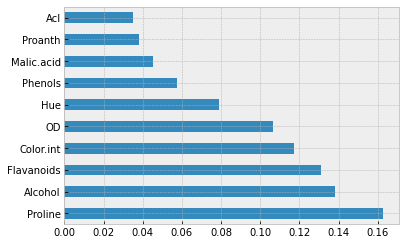

In [107]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()